4767.0
Leptidea_juvernica-period
48
Leptidea_sinapis-period
48
Leptidea_reali-period
48
Leptophobia_aripa-period
48
Pieris_melete-period
48
Pieris_napi-period
48
Pieris_mannii-period
48
Pieris_rapae-period
48
Pieris_brassicae-period
48
Aporia_crataegi-period
48
Anthocharis_cardamines-period
48
Zerene_cesonia-period
48
Colias_nastes-period
48
Colias_croceus-period
48
Colias_eurytheme-period
48
Phoebis_sennae-period
48
Eurema_hecabe-period
48
Papilio_demoleus-period
48
Papilio_protenor-period
48
Papilio_polytes-period
48
Papilio_memnon-period
48
Papilio_xuthus-period
48
Papilio_machaon-period
48
Papilio_dardanus_tibullus-period
48
Papilio_glaucus-period
48
Papilio_elwesi-period
48
Parnassius_glacialis-period
48
Teinopalpus_imperialis-period
48
Ornithoptera_alexandrae-period
48
Ornithoptera_priamus-period
48
Troides_oblongomaculatus-period
48
Troides_aeacus-period
48
Battus_philenor-period
48
Napeogenes_sylphis-period
48
Napeogenes_inachia-period
48
Dircenna_loreta-period
48
Mechanitis_me

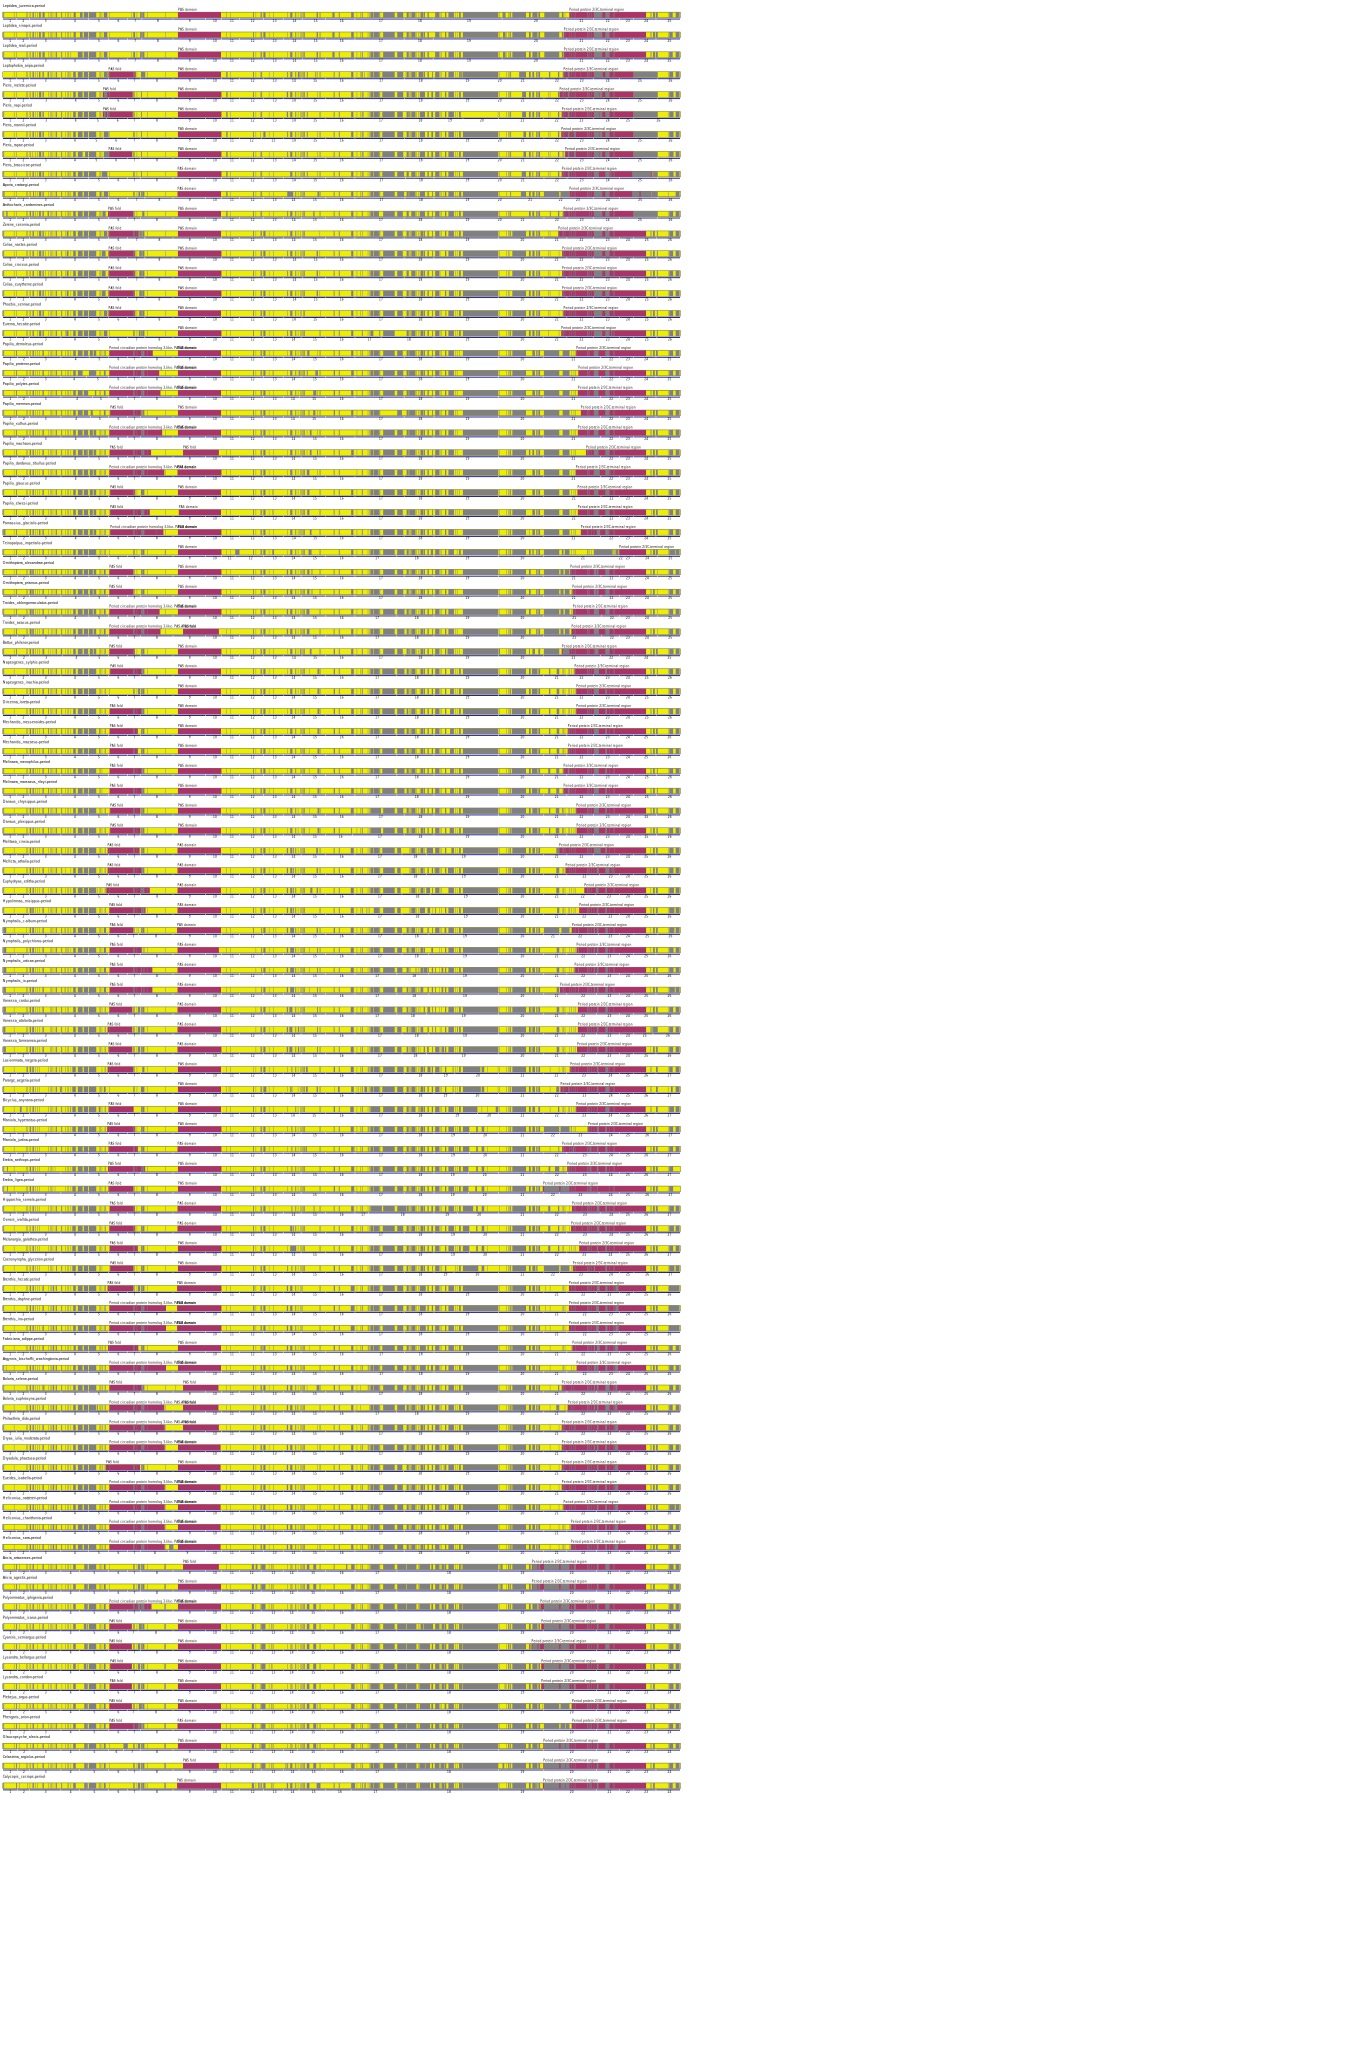

In [6]:
import drawsvg as draw
from Bio import SeqIO
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/6.Period Exon Analysis/11.Alignment/"
length_factor = 1
fasta_file = SeqIO.parse(f"{location}/period.masceDNA.fas", 'fasta')
for record in fasta_file:
    total_length = len(record.seq)/length_factor
    break
print(total_length)
# total_length = 1947

from Bio import Phylo
tree = Phylo.read(f"{location}/period.masceDNA.fas.treefile_figtree", 'newick')
species_list = [term.name for term in tree.get_terminals()]
# print(species_list)

# dm = "Drosophila_melanogaster-AAA28752-period,1-180,211-212,242-250,283-322,522-524,526-529,533-534,553-559,560-568,754-759,795-797,802-803,832-833,842-850,895-899,907-909,915-916,921-939,959-962,1083-1084,1086-1087,1105-1112,1114-1129,1141-1142,1147-1148,1153-1156,1176-1234,1242-1250,1255-1258,1264-1265,1307-1309,1317-1319,1343-1349,1356-1358,1360-1361,1386-1395,1428-1439,1462-1475,1530-1584,1604-1643".split(",")
with open(f"{location}/06.For figure/gap_position.txt", 'r') as gap_file:
    gap_list = gap_file.readlines()
with open(f"{location}/05.InterProScan/pfam_results_position_fixed.txt", 'r') as domain_file:
    domain_list = domain_file.readlines()
with open(f"{location}/06.For figure/exon_position.txt", 'r') as exons_file:
    exons_list = exons_file.readlines()
    
d = draw.Drawing(total_length, 80*len(gap_list))    

for species_number in range(len(species_list)):
    species_name = species_list[species_number]
    # print(species_name)
    
    for gap_line in range(len(gap_list)):
        
        dm = gap_list[gap_line].strip().split(",")
        
        if dm[0] == species_name:
            print(dm[0])
            d.append(draw.Lines(10, 20*(species_number+1) + 50*(species_number) + 20,
                                 10+(total_length/10)*5, 20*(species_number+1)+ 50*(species_number) + 20,
                                10+(total_length/10)*5,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                10,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                close=True,
                        fill='#eeee00',
                        stroke='black'))
            d.append(draw.Text(dm[0], 12, 10, 20*(species_number+1)-18+ 50*(species_number) + 20))
            length = round((total_length)/100)
            print(length)
            for domain_line in domain_list:
                if dm[0] in domain_line:
                    domain_line_split = domain_line.strip().split("\t")
                
                    start, stop = int(domain_line_split[6])*3/length_factor, int(domain_line_split[7])*3/length_factor
                    
                    d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                               10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                               10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                               10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                               close = True,
                               fill = "#AA336A"))
                    d.append(draw.Text(f"{domain_line_split[5]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
               
            
            for i in range(1,len(dm)):
                # print(dm[i])
                start,stop = int(dm[i].split("-")[0])/length_factor,int(dm[i].split("-")[1])/length_factor
                d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#808080"))
           
            for exon_line in exons_list:
                if dm[0] in exon_line:
                    exon_line_split = exon_line.strip().split(",")
                    # print(exon_line_split)
                    exon_counter = 1
                    for i in range (1, len(exon_line_split)):
                        start,stop = int(exon_line_split[i].split("-")[0])/length_factor+1,(int(exon_line_split[i].split("-")[1])-1)/length_factor
                        d.append(draw.Lines(10+((start-1)*.5), 23+ 20*(species_number+1)+ 50*(species_number) + 20,
                                            10+((start-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
                                            10 + ((stop-1)*.5), 23 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   
                                   
                                   close = True,
                                   fill = "#00008B"))
                        # print(10+((start + ((stop-start)/2) -1)*.5), 35 + 20*(species_number+1)+ 30*(species_number))
                        d.append(draw.Text(str(exon_counter), 10, 10+((start + ((stop-start)/2) -5)*.5), 35 + 20*(species_number+1)+ 50*(species_number) + 20))
                        exon_counter += 1
                        # assert False
                        

            
            
                # print(dm[i])
                # break

d.save_svg(f"{location}/domains.svg" )
d